# 포켓몬 게임 데이터 EDA(사전적 데이터분석)

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#magic method (F-12)
%matplotlib inline
%config inlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


데이터셋을 pandas로 불러오기

In [3]:
import os
csv_path = os.getenv("HOME")+"/aiffel/pokemon_eda/data/Pokemon.csv"
origin_data = pd.read_csv(csv_path)

In [4]:
#원본 데이터의 복사본 생성
pokemon = origin_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
#전설의 포켓몬
legendary = pokemon[pokemon['Legendary']==True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [6]:
#일반 포켓몬
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


빈 데이터 확인하기

In [7]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

전체 컬럼 정보

In [8]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

Unique한가 확인

In [9]:
len(pokemon['#']), len(set(pokemon['#'])) #set : 중복데이터 제외

(800, 721)

In [10]:
#ID 같은 포켓몬 확인
pokemon[pokemon['#']==6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [11]:
len(set(pokemon["Name"]))

800

In [12]:
# index 6, 10 확인
pokemon.loc[[6,10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [13]:
# 속성(Type)의 종류
list(set(pokemon['Type 1']))

['Normal',
 'Grass',
 'Poison',
 'Electric',
 'Dark',
 'Flying',
 'Ghost',
 'Bug',
 'Fairy',
 'Water',
 'Rock',
 'Psychic',
 'Dragon',
 'Fighting',
 'Ice',
 'Steel',
 'Fire',
 'Ground']

In [14]:
len(list(set(pokemon['Type 1']))), len(list(set(pokemon["Type 2"])))

(18, 19)

In [15]:
# Type1과 Type2 차이
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

In [16]:
types = list(set(pokemon['Type 1']))
print(len(types))
print(types)

18
['Normal', 'Grass', 'Poison', 'Electric', 'Dark', 'Flying', 'Ghost', 'Bug', 'Fairy', 'Water', 'Rock', 'Psychic', 'Dragon', 'Fighting', 'Ice', 'Steel', 'Fire', 'Ground']


In [17]:
# isna() = isnull()
# Type 2가 Nan인 포켓몬 수
pokemon["Type 2"].isna().sum()

386

Type 1 분포

Text(0.5, 0, '')

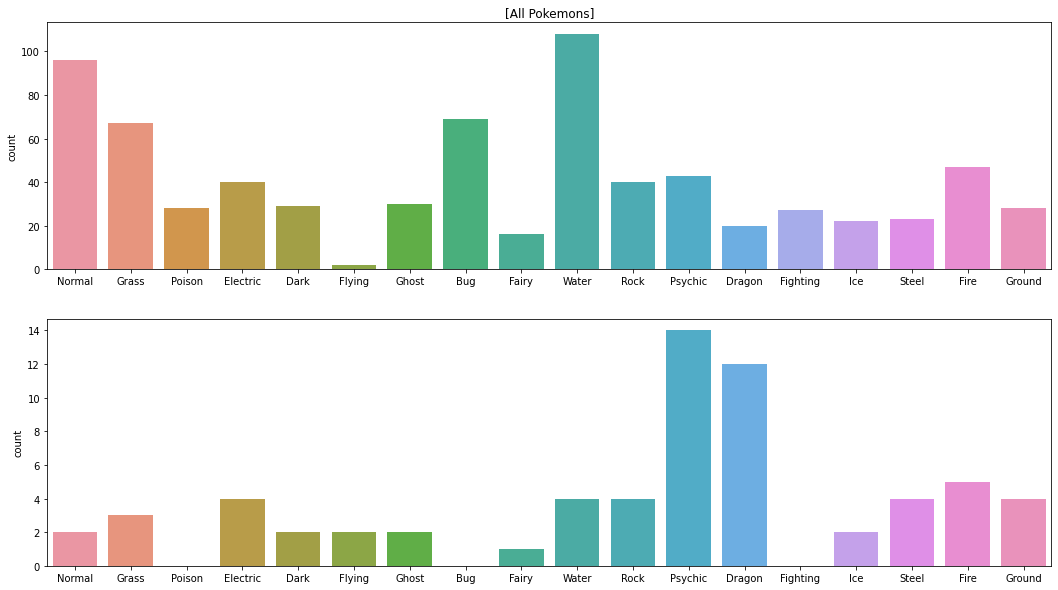

In [18]:
plt.figure(figsize=(18,10))
plt.subplot(211)
#countplot 범주, 빈도수 시각화
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title('[All Pokemons]')

plt.subplot(212)
sns.countplot(data=legendary, x='Type 1', order=types).set_xlabel('')

In [19]:
# Type1별로 legendary의 비율을 보여주는 피벗테이블, sort_values이용 내림차순정리
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=['Legendary'], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


Type 2 분포

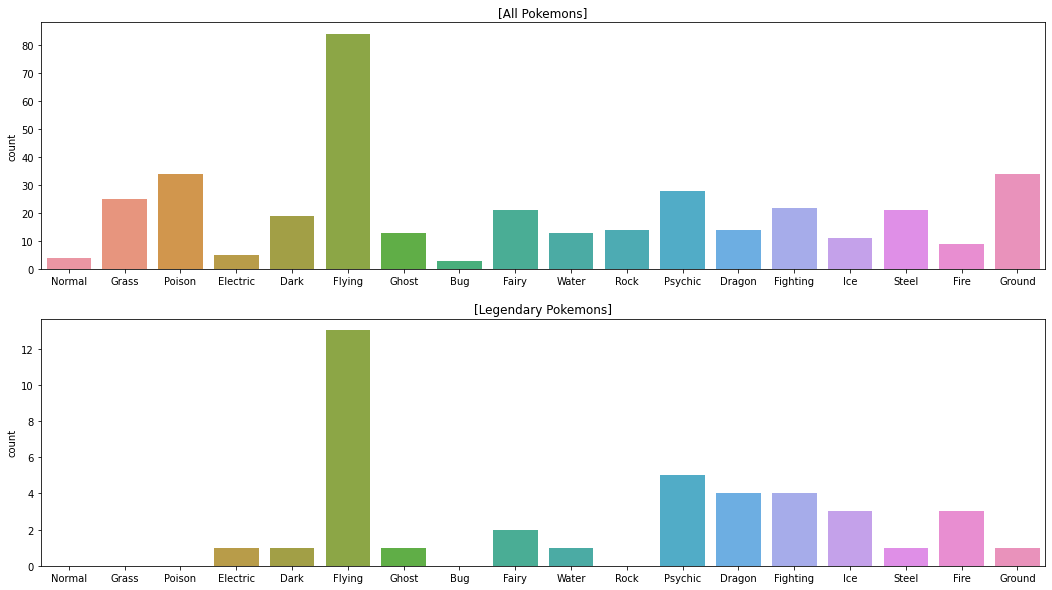

In [20]:
plt.figure(figsize=(18, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[All Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [21]:
# Type2별로 Legendary 의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


# 모든 스탯의 총합

In [22]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

실제 스탯의 총합과 데이터의 total값이 맞는가 (데이터 검증)

In [23]:
pokemon.loc[0]

#                     1
Name          Bulbasaur
Type 1            Grass
Type 2           Poison
Total               318
HP                   45
Attack               49
Defense              49
Sp. Atk              65
Sp. Def              65
Speed                45
Generation            1
Legendary         False
Name: 0, dtype: object

In [24]:
# 1번 pokemon 검증
print("#0 pokemon:{}\n".format(pokemon.loc[0,"Name"]))
print("total:", int(pokemon.loc[0,"Total"]))
#print("stats:", list(pokemon.loc[0,stats]))


#0 pokemon:Bulbasaur

total: 318


In [25]:
# {}위치에 .format이용 pokemon.loc[0, "Name"]값 넣음
print("#0 pokemon: {}\n".format(pokemon.loc[0, "Name"])) 
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats])) # 0번 index의 원하는 column값(리스트화) 확인가능
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon: Bulbasaur

total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [26]:
#toral ,stats합 같은가?
#가로방향 합산 >> axis=1
sum(pokemon['Total'].values==pokemon[stats].values.sum(axis=1))

800

Total값에 따른 분포 plot

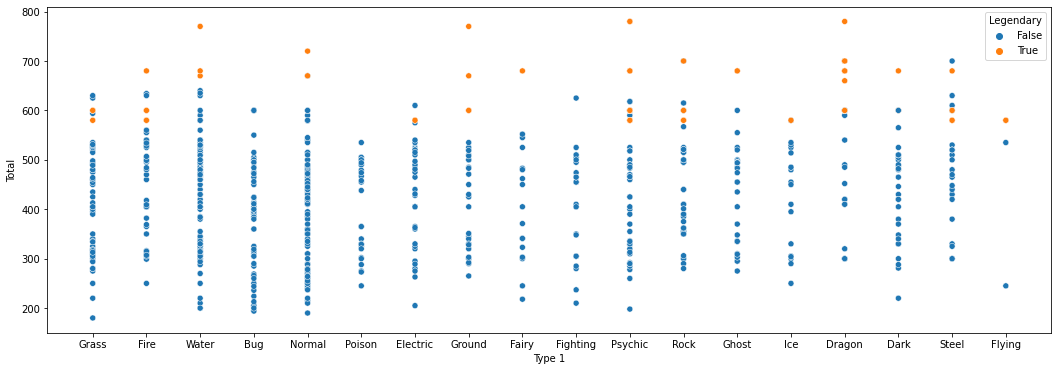

In [27]:
flg, ax = plt.subplots()
flg.set_size_inches(18, 6)

#legendary여부에 따라 hue를 다르게
sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

#전설 포켓몬의 total값이 높다

전설 포켓몬의 세부스탯 알아보기

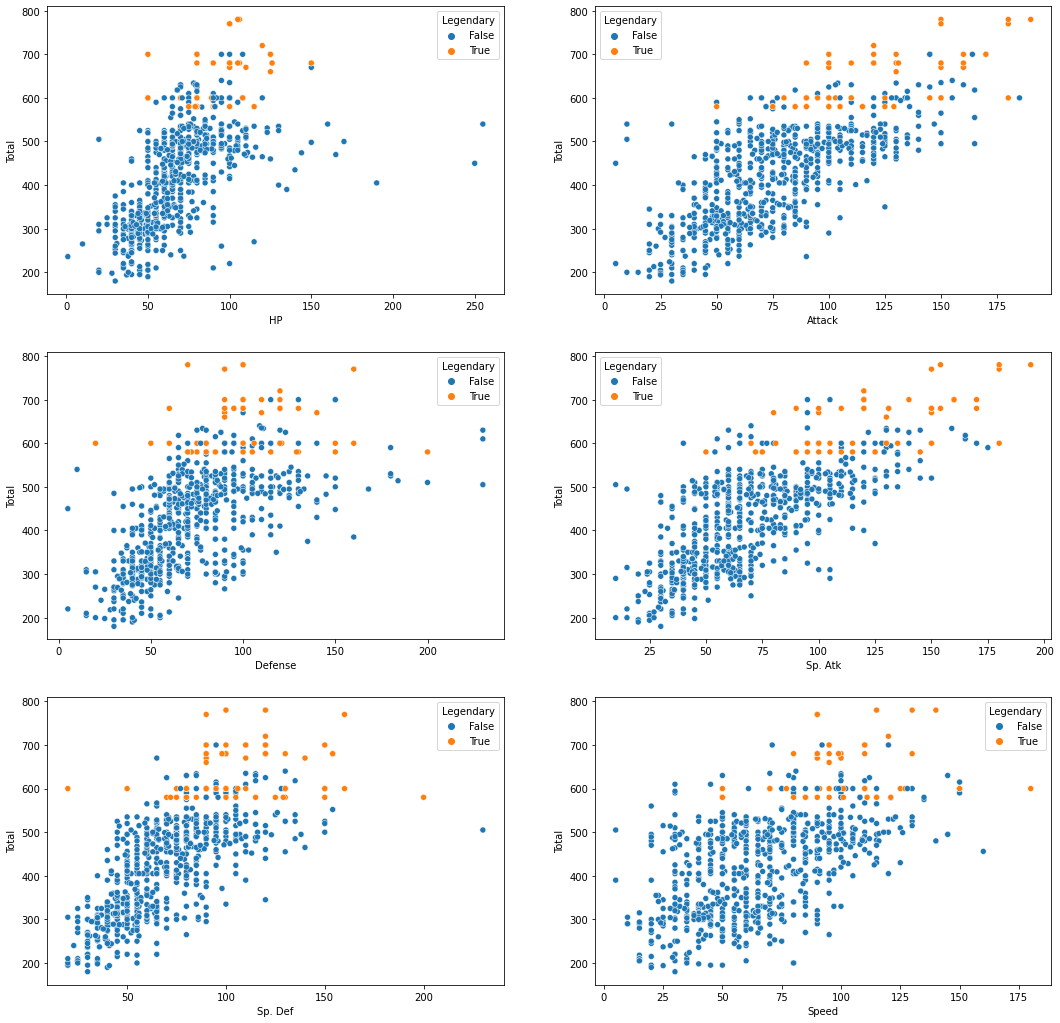

In [28]:
figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(18,18)

sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)
plt.show()

Generation?

In [29]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


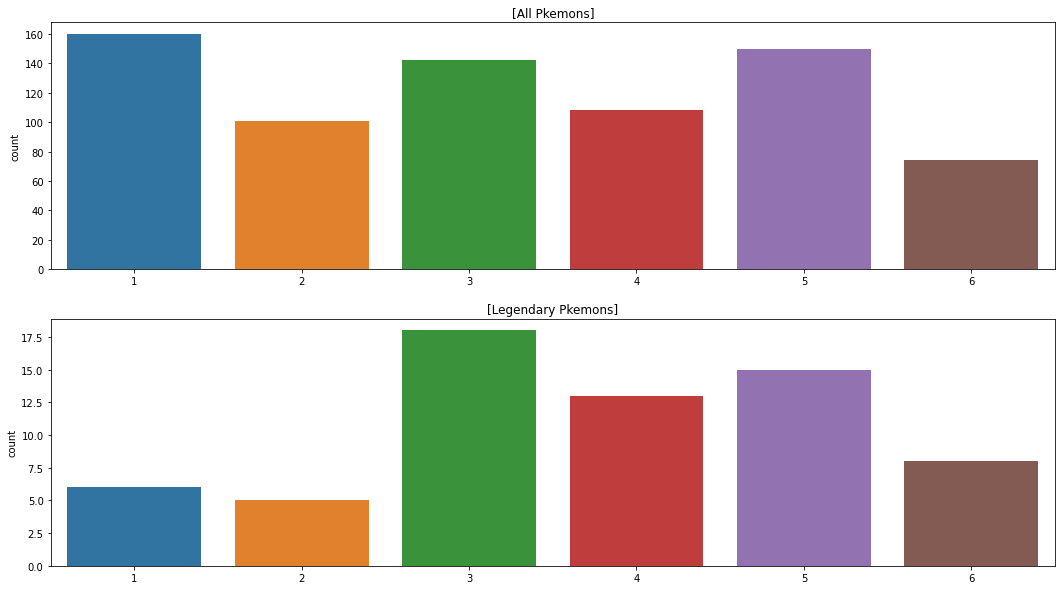

In [30]:
plt.figure(figsize=(18, 10))

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[All Pkemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pkemons]")
plt.show()

# 전설, 일반포켓몬의 차이는?

Total로 확인

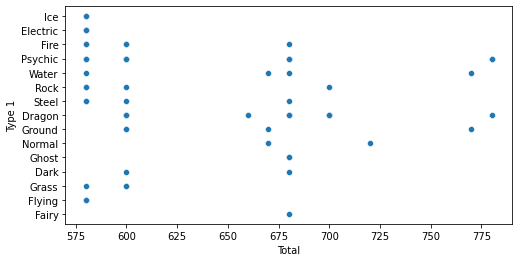

In [31]:
flg, ax = plt.subplots()
flg.set_size_inches(8,4)

sns.scatterplot(data=legendary, y="Type 1", x = "Total")
plt.show()
# 특정 total score에 전설 포켓몬이 몰려있다.

In [32]:
print((legendary['Total']))
sorted(list(set(legendary["Total"]))) #중복제거후 리스트로 만들어 오름차순정렬

0     580
1     580
2     580
3     680
4     780
     ... 
60    600
61    700
62    600
63    680
64    600
Name: Total, Length: 65, dtype: int64


[580, 600, 660, 670, 680, 700, 720, 770, 780]

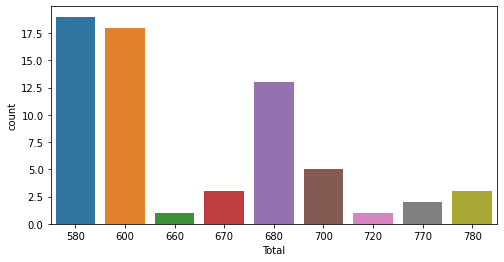

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()
#65마리가 9개의total값을 갖고있음 (특정수치)

In [34]:
round(65 / 9, 2) #평균, 소수점 둘째자리까지

7.22

In [35]:
print(sorted(list(set(ordinary["Total"]))))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


In [36]:
len(sorted(list(set(ordinary["Total"])))) #195개의 total값

195

In [37]:
round(735 / 195, 2) #일반 포켓몬 total값 평균은 약3.7 (전설:7.2)

3.77

In [38]:
print(legendary.columns, len(legendary.columns))
print(ordinary.columns, len(ordinary.columns))

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object') 13
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object') 13


In [39]:
#list(set(legendary["Total"]))
sorted(list(set(ordinary["Total"])))

[180,
 190,
 194,
 195,
 198,
 200,
 205,
 210,
 213,
 215,
 218,
 220,
 224,
 236,
 237,
 240,
 244,
 245,
 250,
 251,
 253,
 255,
 260,
 262,
 263,
 264,
 265,
 266,
 269,
 270,
 273,
 275,
 278,
 280,
 281,
 285,
 288,
 289,
 290,
 292,
 294,
 295,
 299,
 300,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 313,
 314,
 315,
 316,
 318,
 319,
 320,
 323,
 325,
 328,
 329,
 330,
 334,
 335,
 336,
 340,
 341,
 345,
 348,
 349,
 350,
 351,
 352,
 355,
 358,
 360,
 362,
 363,
 365,
 369,
 370,
 371,
 375,
 380,
 382,
 384,
 385,
 390,
 395,
 400,
 401,
 405,
 409,
 410,
 411,
 413,
 414,
 415,
 418,
 420,
 423,
 424,
 425,
 428,
 430,
 431,
 435,
 438,
 440,
 442,
 445,
 446,
 448,
 450,
 452,
 454,
 455,
 456,
 458,
 460,
 461,
 462,
 464,
 465,
 466,
 467,
 468,
 470,
 471,
 472,
 473,
 474,
 475,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 487,
 488,
 489,
 490,
 494,
 495,
 497,
 498,
 499,
 500,
 505,
 507,
 508,
 509,
 510,
 514,
 515,
 518,
 519,
 520,
 521,
 523,
 525,
 528

In [40]:
# 전설의 포켓몬의 Total 값 중에는 일반 포켓몬이 가지지 못하는 Total값이 존재한다.
# ex) 680, 720, 770, 780
# total값으로 전설여부 판정가능?
set(legendary["Total"])-set(ordinary["Total"])

{660, 680, 720, 770, 780}

이름

In [41]:
pd.options.display.max_rows=30
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]

In [42]:
print(n1, n2, n3, n4, n5, sep='\n\n')

     #                 Name   Type 1    Type 2  Total   HP  Attack  Defense  \
3  150               Mewtwo  Psychic       NaN    680  106     110       90   
4  150  MewtwoMega Mewtwo X  Psychic  Fighting    780  106     190      100   
5  150  MewtwoMega Mewtwo Y  Psychic       NaN    780  106     150       70   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
3      154       90    130           1       True  
4      154      100    130           1       True  
5      194      120    140           1       True  

      #                   Name  Type 1   Type 2  Total   HP  Attack  Defense  \
14  380                 Latias  Dragon  Psychic    600   80      80       90   
15  380      LatiasMega Latias  Dragon  Psychic    700   80     100      120   
16  381                 Latios  Dragon  Psychic    600   80      90       80   
17  381      LatiosMega Latios  Dragon  Psychic    700   80     130      100   
18  382                 Kyogre   Water      NaN    670  100     100       

In [43]:
# 새로운 DataFrame으로 결합후 인덱스 초기화, 기존인덱스 삭제
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [44]:
ordinary[6:9] #???

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [45]:
#비슷한 이름, forme존재, 긴 이름 >>전설 가능성 높음
formes = names[13:23]
formes #전부 true이므로 forme이 있으면 전설 가능성 매우 높다.

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


번외 :이름에 Mega 있는데 일반포켓몬

In [46]:
ordinary.loc[:,['Name', 'Legendary']]

,Name,Legendary
0,Bulbasaur,False
1,Ivysaur,False
2,Venusaur,False
3,VenusaurMega Venusaur,False
4,Charmander,False
...,...,...
730,GourgeistSuper Size,False
731,Bergmite,False
732,Avalugg,False
733,Noibat,False


In [47]:
for i in pokemon.loc[:,['Name', 'Legendary']].values: #  인덱스기준으로 슬라이싱한것에 접근하기위해 values 필요, 
    if "Mega" in i[0]: # 해당 row를 list방식으로 접근 가능 
        #print(i)
        if i[1] == False: #legenday여부
            print(i)
            
        
# for Name Legendary in ordinary.loc[:,['Name', 'Legendary']] -- [0]=Name, [1]=Legendary 할당 (리스트의 크기 알때 가능)    
# >>이름에 mega가 들어가는 것 검색 if "Mega" in i:

['VenusaurMega Venusaur' False]
['CharizardMega Charizard X' False]
['CharizardMega Charizard Y' False]
['BlastoiseMega Blastoise' False]
['BeedrillMega Beedrill' False]
['PidgeotMega Pidgeot' False]
['AlakazamMega Alakazam' False]
['SlowbroMega Slowbro' False]
['GengarMega Gengar' False]
['KangaskhanMega Kangaskhan' False]
['PinsirMega Pinsir' False]
['GyaradosMega Gyarados' False]
['AerodactylMega Aerodactyl' False]
['Meganium' False]
['AmpharosMega Ampharos' False]
['SteelixMega Steelix' False]
['ScizorMega Scizor' False]
['HeracrossMega Heracross' False]
['HoundoomMega Houndoom' False]
['TyranitarMega Tyranitar' False]
['SceptileMega Sceptile' False]
['BlazikenMega Blaziken' False]
['SwampertMega Swampert' False]
['GardevoirMega Gardevoir' False]
['SableyeMega Sableye' False]
['MawileMega Mawile' False]
['AggronMega Aggron' False]
['MedichamMega Medicham' False]
['ManectricMega Manectric' False]
['SharpedoMega Sharpedo' False]
['CameruptMega Camerupt' False]
['AltariaMega Altaria' 

긴 이름

In [48]:
#legendary와 ordinary 각각에 모두 "name_count"라는 이름의 길이를 나타내는 컬럼을 만들어줍니다. 
#파이썬 람다(lambda) 기능을 사용해 행마다 이름의 길이를 구하고, 이를 "name_count" 칼럼에 넣어주었습니다.
#(lambda x,y:x+y+2)(3,6) >>input x -->output x+y+2 ex)3+6+2
legendary["name_count"] = legendary["Name"].apply(lambda i:len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [49]:
legendary["Name"].map(lambda i:len(i))

0      8
1      6
2      7
3      6
4     19
      ..
60     7
61    19
62    19
63    18
64     9
Name: Name, Length: 65, dtype: int64

In [50]:
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))    
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


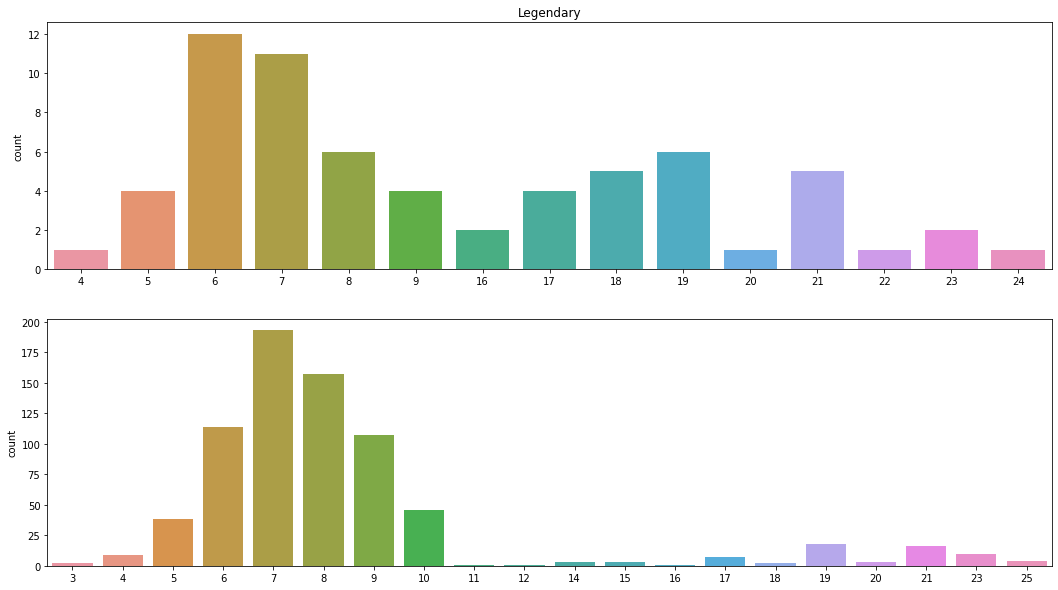

In [51]:
plt.figure(figsize=(18,10))

plt.subplot(211)
sns.countplot(data=legendary, x='name_count').set_xlabel('') # x축 제목
plt.title("Legendary")

plt.subplot(212)
sns.countplot(data=ordinary, x='name_count').set_xlabel('')
plt.show()
# name길이가 10이상인 일반포켓몬 적음 >이름 길수록 전설 가능성 up?

In [52]:
# 전설, 일반 포켓몬 이름이 10자 이상일 확률 
len(legendary), len(legendary[legendary["name_count"]>9])

(65, 27)

In [53]:
round(len(legendary[legendary["name_count"]>9])/len(legendary)*100,2)

41.54

In [54]:
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


# 데이터 전처리하기<br>
## 이름 처리하기<br>
* 1. 이름의 길이 : name_count 컬럼을 생성 후 길이가 10을 넘는지 아닌지에 대한 categorical 컬럼을 생성<br>
* 2. 토큰 추출 : legendary 포켓몬에서 많이 등장하는 토큰을 추려내고 토큰 포함 여부를 원-핫 인코딩(One-Hot Encoding)으로 처리

이름의 길이가 10이상인가

In [55]:
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [56]:
# 10이상 true, 미만 false
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


이름의 유형<br>
1. 한단어  
2. 두단어(앞단어는 두개의 대문자, 대문자 기준 두부분으로 나뉨)  
3. 이름 두단어 + 성별X,Y
4. 알파벳아닌 문자포함

4.

In [57]:
# 문자열이 알파벳으로만 만들어졌나 확인 :  isaplpha() 사용
# 이름에 **띄어쓰기가 있는경우**도 isalpha로 걸러지므로 띄어쓰기 없는 새 column 생성후 확인
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i:i.replace(" ",""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [58]:
# 알파벳만 있나 확인
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i:i.isalpha())
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion,True


In [59]:
# 알파벳 아닌문자 포함된 것 확인
print(pokemon[pokemon['name_isalpha']==False].shape)
pokemon[pokemon["name_isalpha"] == False]
#pokemon[pokemon["name_isalpha"] == False].loc[:,['#','Name']]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [60]:
# 9개>>소량이니 수작업
pokemon = pokemon.replace("Nidoran♀", "Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

In [61]:
# 해당 데이터 index번호로 변화여부 확인
pokemon.loc[[34,37,90,131,252,270,487,525,794]] #전체 열 필요하므로 loc[행, 열]의 행만 입력

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [62]:
# 바뀐 Name으로 다시 nonspace column 생성후 isalpha로 체크
pokemon['Name_nospace'] = pokemon['Name'].apply(lambda i:i.replace(" ",""))
pokemon['name_isalpha'] = pokemon['Name_nospace'].apply(lambda i:i.isalpha())
pokemon[pokemon['name_isalpha'] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


정규식 re패키지 이용<br>
Dot(.) a.b >> a()b 줄바꿈제외한 모든문자와 매치    
*무한반복  
+1번이상반복  
{1,3} 1번~3번 반복

In [63]:
import re

In [64]:
# 이름을 쪼개서 list화 목표
name = 'CharizardMega Charizard X'

In [65]:
name_split = name.split(' ') # 공백기준 분리
name_split


['CharizardMega', 'Charizard', 'X']

In [66]:
# CharizardMega >> 2단어로 분리 필요
temp = name_split[0]
temp

'CharizardMega'

In [67]:
#re compile 이용
p=re.compile('[A-Z][a-z]*')
tokens2 = p.findall(temp)
tokens2

['Charizard', 'Mega']

In [68]:
# re.findall로 한번에 해결 가능
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

In [69]:
# 이름을 이루고 있는 token들을 list에 저장
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
    print(tokens)
print('result:',tokens)

['Charizard', 'Mega']
['Charizard', 'Mega', 'Charizard']
['Charizard', 'Mega', 'Charizard', 'X']
result: ['Charizard', 'Mega', 'Charizard', 'X']


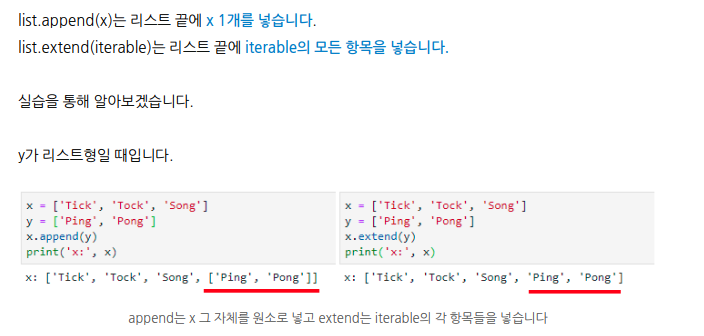

In [70]:
from IPython.display import Image 
Image('/home/jin/Pictures/append.png')

![Image]('/home/jin/Pictures/append.png')

이름 토큰화 과정 함수

In [71]:
def tokenize(name):
    name_split = name.split(" ")
    
    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
        
    return np.array(tokens)

In [72]:
name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

전설 포켓몬 데이터셋에 적용

In [73]:
all_tokens = list(legendary["Name"].apply(tokenize))

token_set = []
for token in all_tokens:
    print(token)
    print(type(token))
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

['Articuno']
<class 'numpy.ndarray'>
['Zapdos']
<class 'numpy.ndarray'>
['Moltres']
<class 'numpy.ndarray'>
['Mewtwo']
<class 'numpy.ndarray'>
['Mewtwo' 'Mega' 'Mewtwo' 'X']
<class 'numpy.ndarray'>
['Mewtwo' 'Mega' 'Mewtwo' 'Y']
<class 'numpy.ndarray'>
['Raikou']
<class 'numpy.ndarray'>
['Entei']
<class 'numpy.ndarray'>
['Suicune']
<class 'numpy.ndarray'>
['Lugia']
<class 'numpy.ndarray'>
['Ho']
<class 'numpy.ndarray'>
['Regirock']
<class 'numpy.ndarray'>
['Regice']
<class 'numpy.ndarray'>
['Registeel']
<class 'numpy.ndarray'>
['Latias']
<class 'numpy.ndarray'>
['Latias' 'Mega' 'Latias']
<class 'numpy.ndarray'>
['Latios']
<class 'numpy.ndarray'>
['Latios' 'Mega' 'Latios']
<class 'numpy.ndarray'>
['Kyogre']
<class 'numpy.ndarray'>
['Kyogre' 'Primal' 'Kyogre']
<class 'numpy.ndarray'>
['Groudon']
<class 'numpy.ndarray'>
['Groudon' 'Primal' 'Groudon']
<class 'numpy.ndarray'>
['Rayquaza']
<class 'numpy.ndarray'>
['Rayquaza' 'Mega' 'Rayquaza']
<class 'numpy.ndarray'>
['Jirachi']
<class 'nump

In [74]:
legendary["Name"].head(), legendary["Name"].head().values

(0               Articuno
 1                 Zapdos
 2                Moltres
 3                 Mewtwo
 4    MewtwoMega Mewtwo X
 Name: Name, dtype: object,
 array(['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'MewtwoMega Mewtwo X'],
       dtype=object))

In [79]:
from collections import Counter

In [75]:
import collections

In [78]:
# # Counter 이용
# my_list = ['a','d','c','a','b']
# my_counter = collections.Counter(my_list)
# my_counter >>Counter({'a': 2, 'd': 1, 'c': 1, 'b': 1})

Counter({'a': 2, 'd': 1, 'c': 1, 'b': 1})

In [81]:
#most_common() : 가장 많은 요소, 등장횟수순 정렬
most_common = Counter(token_set).most_common(10) # 10개만 출력
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

In [83]:
#해당 토큰이 포켓몬의 이름에 있는지 확인하는 column 생성
for token, _ in most_common:
    #name에 token이 있는가? true,false반환
    pokemon[token] = pokemon['Name'].str.contains(token) 
    
pokemon.head(10)
#문자열 데이터를 그대로 사용하기엔 부족하므로 숫자나 bull데이터로 변환후 사용하면
#모델 성능 향상에 도움

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


## 범주형 데이터 처리하기<br>
one-hot encoding

In [84]:
print(types)

['Normal', 'Grass', 'Poison', 'Electric', 'Dark', 'Flying', 'Ghost', 'Bug', 'Fairy', 'Water', 'Rock', 'Psychic', 'Dragon', 'Fighting', 'Ice', 'Steel', 'Fire', 'Ground']


In [85]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t) # | == or
    
pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Normal,Grass,Poison,Electric,Dark,Flying,Ghost,Bug,Fairy,Water,Rock,Psychic,Dragon,Fighting,Ice,Steel,Fire,Ground
0,Grass,Poison,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Grass,Poison,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Grass,Poison,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Grass,Poison,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Fire,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [90]:
types

['Normal',
 'Grass',
 'Poison',
 'Electric',
 'Dark',
 'Flying',
 'Ghost',
 'Bug',
 'Fairy',
 'Water',
 'Rock',
 'Psychic',
 'Dragon',
 'Fighting',
 'Ice',
 'Steel',
 'Fire',
 'Ground']

In [91]:
types[0]

'Normal'

In [93]:
# pokemon DataFrame에 types의 요소들(t)로 새 컬럼 생성
# >> Type1 or Type2 == t >> 맞는건 true 아닌건 false로 생성됨
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

# pokemon type1, type2 컬럼에 types(개별속성)컬럼을 리스트로 추가시켜서 조회
# [Type1, Type2, Normal, Grass....]
pokemon[["Type 1", "Type 2"] + types].head()

,Type 1,Type 2,Normal,Grass,Poison,Electric,Dark,Flying,Ghost,Bug,Fairy,Water,Rock,Psychic,Dragon,Fighting,Ice,Steel,Fire,Ground
0,Grass,Poison,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Grass,Poison,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Grass,Poison,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Grass,Poison,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Fire,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


# 가장 기본 데이터로 만드는 베이스 라인<br>
* 전처리 한것이 아닌 기본 컬럼 이용해서 baseline모델 생성

In [95]:
print(origin_data.shape)
origin_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


문자열데이터 제외 필요

In [96]:
origin_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [99]:
# #, 문자열, bool 데이터 제외
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [100]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [101]:
target = 'Legendary'

In [103]:
X = origin_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [104]:
y = origin_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [105]:
# 모델용 자료 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)
